In [62]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("titanic.csv")
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [65]:
df_clean = df.convert_dtypes()
df_clean.replace(0, np.nan, inplace=True)
df_clean.dropna(how='all', axis=1, inplace=True)
df_clean.replace(np.nan, 0, inplace=True)
df_clean.columns = df_clean.columns.str.lower()
df_clean.rename(columns={'passengerid': 'passenger_id', 'pclass': 'p_class', 'sibsp': 'sib_sp', 'parch': 'par_ch', '2urvived': 'survived'}, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1309 non-null   Int64  
 1   age           1309 non-null   Float64
 2   fare          1309 non-null   Float64
 3   sex           1309 non-null   Int64  
 4   sib_sp        1309 non-null   Int64  
 5   par_ch        1309 non-null   Int64  
 6   p_class       1309 non-null   Int64  
 7   embarked      1309 non-null   Int64  
 8   survived      1309 non-null   Int64  
dtypes: Float64(2), Int64(7)
memory usage: 103.7 KB


<Axes: >

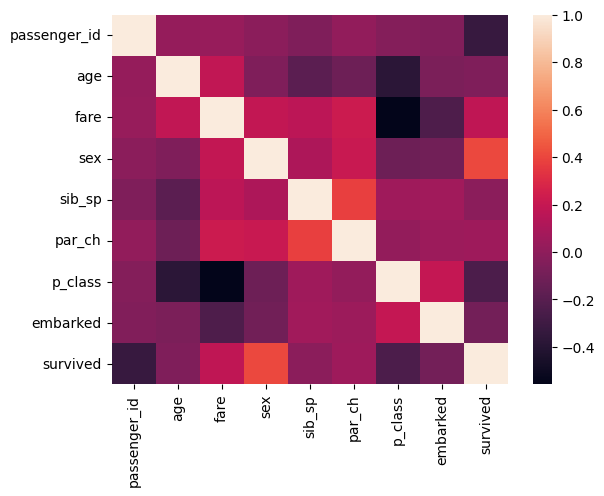

In [66]:
corr_map = df_clean.corr()
sns.heatmap(corr_map)

Text(0.5, 1.0, 'Correlation with Survival')

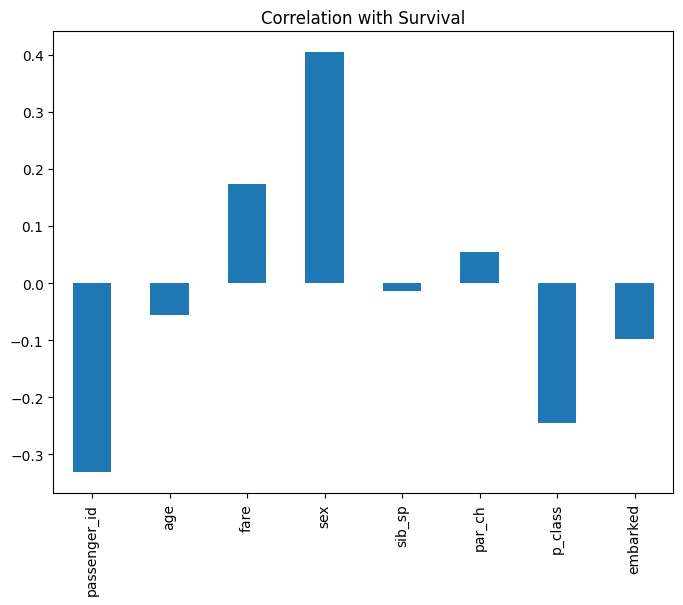

In [67]:
surv_map = corr_map['survived']
surv_map = surv_map.drop('survived')
plt.figure(figsize=(8, 6))
surv_map.plot(kind='bar')
plt.title(f'Correlation with Survival')

<Axes: xlabel='fare', ylabel='survived'>

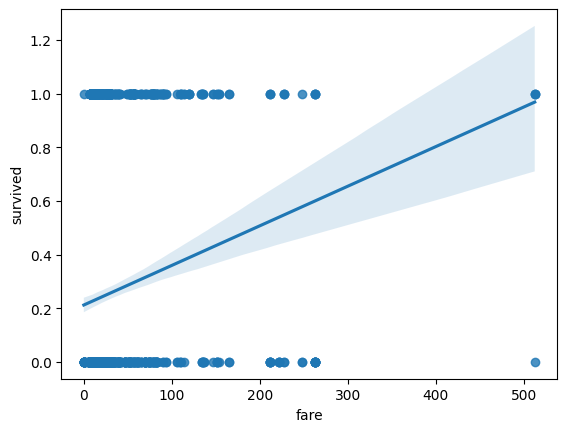

In [68]:
sns.regplot(x= 'fare', y = 'survived', data=df_clean)

<Axes: xlabel='passenger_id', ylabel='survived'>

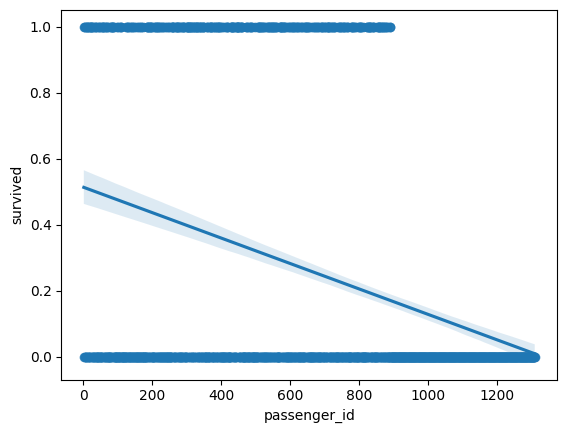

In [69]:
sns.regplot(x= 'passenger_id', y = 'survived', data=df_clean)

<Axes: xlabel='sex', ylabel='survived'>

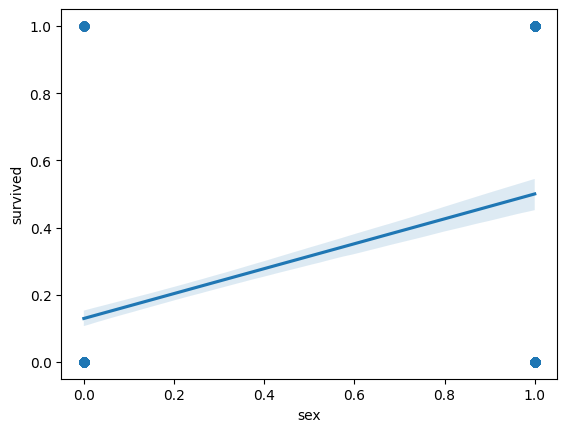

In [71]:
sns.regplot(x= 'sex', y = 'survived', data=df_clean)

<Axes: xlabel='p_class', ylabel='survived'>

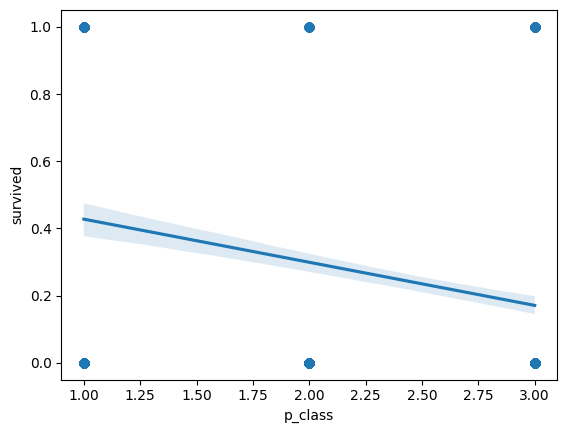

In [72]:
sns.regplot(x= 'p_class', y = 'survived', data=df_clean)

<Axes: xlabel='embarked', ylabel='survived'>

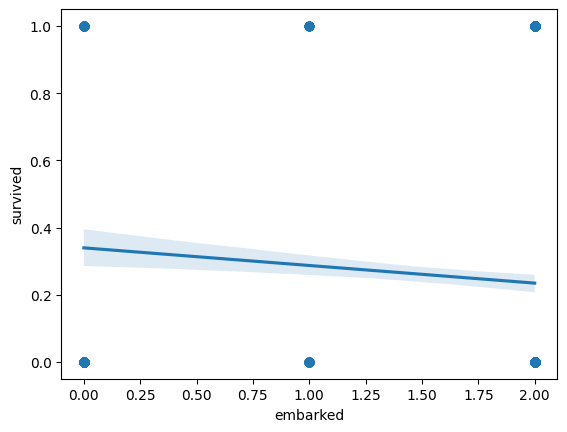

In [77]:
sns.regplot(x= 'embarked', y = 'survived', data=df_clean)

In [74]:
df_clean.skew()

,0
passenger_id,0.0
age,0.540987
fare,4.36951
sex,0.602189
sib_sp,3.84422
par_ch,3.669078
p_class,-0.598647
embarked,-1.118807
survived,1.088057


In [78]:
categorical_columns = ['sex', 'sib_sp', 'par_ch', 'p_class', 'embarked']
df_clean['survived'] = df_clean['survived'].astype('bool')
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns)
for column in categorical_columns:
    df_clean[column] = df_clean[column].astype('object')
df_encoded.head()

,passenger_id,age,fare,survived,sex_0,sex_1,sib_sp_0,sib_sp_1,sib_sp_2,sib_sp_3,...,par_ch_4,par_ch_5,par_ch_6,par_ch_9,p_class_1,p_class_2,p_class_3,embarked_0,embarked_1,embarked_2
0,1,22.0,7.25,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2,38.0,71.2833,True,False,True,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
2,3,26.0,7.925,True,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,4,35.0,53.1,True,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,5,35.0,8.05,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [79]:
df_encoded.to_csv('titanic_eda.csv')